### Cell 1: Setup and data loading

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

# Load the full CFPB dataset 

file_path = '../data/raw/complaints.csv' 
df = pd.read_csv(file_path, low_memory=False)

### Cell 2: Initial EDA & Distribution Analysis 

Initial Dataset Shape: (9609797, 18)

Complaints per Product:
 Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                          

C:\Users\user\AppData\Local\Temp\ipykernel_21820\3103456306.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=product_counts.index[:15], x=product_counts.values[:15], palette='viridis')


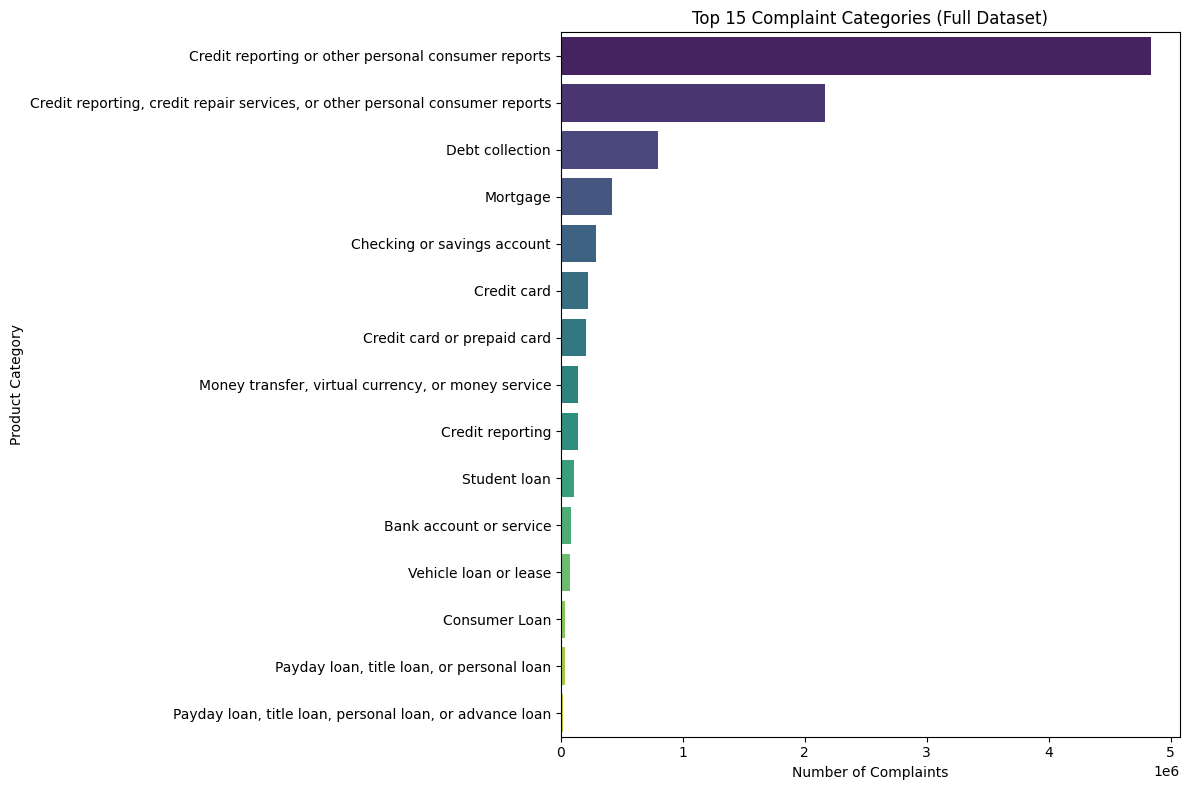

In [19]:
print("Initial Dataset Shape:", df.shape)
product_counts = df['Product'].value_counts()
print("\nComplaints per Product:\n", product_counts)

# Fix: Horizontal bar chart for better readability
plt.figure(figsize=(12, 8))
# Plotting the top 15 categories to avoid overcrowding
sns.barplot(y=product_counts.index[:15], x=product_counts.values[:15], palette='viridis')
plt.title("Top 15 Complaint Categories (Full Dataset)")
plt.xlabel("Number of Complaints")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()

### Cell 3: Identify complaints with/without narratives 

In [20]:
has_narrative = df['Consumer complaint narrative'].notnull().sum()
no_narrative = df['Consumer complaint narrative'].isnull().sum()
print(f"Complaints with narratives: {has_narrative}")
print(f"Complaints without narratives: {no_narrative}")

Complaints with narratives: 2980756
Complaints without narratives: 6629041


### Cell 4: Filtering 

In [21]:
# Targeted products: Credit cards, Personal loans, Savings accounts, Money transfers

target_products = [
    # Credit Cards
    'Credit card', 'Credit card or prepaid card', 
    # Personal Loans
    'Consumer Loan', 'Payday loan, title loan, or personal loan', 'Payday loan',
    # Savings Accounts
    'Checking or savings account', 'Bank account or service', 
    # Money Transfers
    'Money transfer, virtual currency, or money service', 'Money transfers'
]

# Filter by product 
df_filtered = df[df['Product'].isin(target_products)].copy()

# Remove records without narratives 
df_filtered = df_filtered[df_filtered['Consumer complaint narrative'].notnull()]

print(f"Remaining records for CrediTrust products: {len(df_filtered)}")

Remaining records for CrediTrust products: 471668


### Cell 5: Narrative Length Analysis 

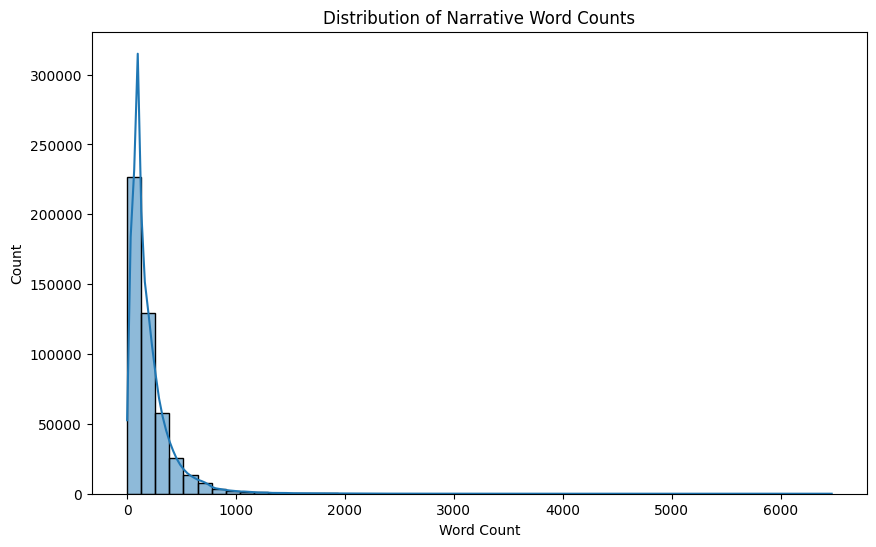

In [22]:
df_filtered['narrative_length'] = df_filtered['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['narrative_length'], bins=50, kde=True)
plt.title("Distribution of Narrative Word Counts")
plt.xlabel("Word Count")
plt.show()

### Cell 6: Text Cleaning 

In [23]:
def clean_text(text):
    # Lowercase 
    text = text.lower()
    # Remove boilerplate 
    text = re.sub(r"i am writing to file a complaint", "", text)
    # Remove special characters/numbers 
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

### Cell 7: Save Cleaned Dataset 

In [24]:
os.makedirs('../data/processed', exist_ok=True)
df_filtered.to_csv('../data/processed/filtered_complaints.csv', index=False)
print("Task 1 Complete: Cleaned data saved to data/processed/filtered_complaints.csv")

Task 1 Complete: Cleaned data saved to data/processed/filtered_complaints.csv
